In [2]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import math

In [3]:
df_nutresa = pd.read_csv("nutresa.csv")
df_nutresa

,Date,Price,Open,High,Low,Vol.,Change %
0,02/14/2024,"46,700.0","46,740.0","46,740.0","46,300.0",1.38K,-0.09%
1,02/13/2024,"46,740.0","45,800.0","46,740.0","45,140.0",5.06K,1.61%
2,02/09/2024,"46,000.0","46,020.0","46,020.0","45,600.0",11.56K,-1.88%
3,02/07/2024,"46,880.0","46,400.0","46,880.0","46,080.0",11.79K,1.25%
4,02/06/2024,"46,300.0","46,380.0","46,380.0","46,000.0",2.35K,0.65%
...,...,...,...,...,...,...,...
827,04/07/2020,"20,020.0","19,840.0","20,200.0","19,840.0",311.22K,1.52%
828,04/06/2020,"19,720.0","20,100.0","20,280.0","18,800.0",165.46K,0.10%
829,04/03/2020,"19,700.0","19,460.0","19,700.0","19,120.0",386.61K,1.23%
830,04/02/2020,"19,460.0","18,200.0","19,460.0","18,020.0",144.65K,4.40%


# Preprocesamiento

In [4]:
#Eliminar columnas inútiles
df_nutresa = df_nutresa.drop(columns=['Open','High','Low','Vol.','Change %'])

#Se invierte el dataframe para empezar desde los datos mas antiguos
df_nutresa = df_nutresa.iloc[::-1]
df_nutresa = df_nutresa.reset_index(drop=True)

#Convertir los precios de string a float
df_nutresa['Price'] = df_nutresa['Price'].str.replace(',', '')
df_nutresa['Price'] = df_nutresa['Price'].astype(float)

#Añade la columna Y_n definida en la guía
new_col = [0]
for i in range(1, len(df_nutresa)):
    new_col.append(float((df_nutresa['Price'][i]/df_nutresa['Price'][i-1]) - 1))
df_nutresa.insert(2, 'Yn', new_col, True)

#Eliminamos primer dato debido a que no se puede calcular Yn
df_nutresa = df_nutresa.drop([0])
df_nutresa = df_nutresa.reset_index(drop=True)

In [5]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_nutresa)

           Date    Price         Yn
0    04/02/2020  19460.0  4.399e-02
1    04/03/2020  19700.0  1.233e-02
2    04/06/2020  19720.0  1.015e-03
3    04/07/2020  20020.0  1.521e-02
4    04/08/2020  20700.0  3.397e-02
5    04/13/2020  21300.0  2.899e-02
6    04/14/2020  22780.0  6.948e-02
7    04/15/2020  22980.0  8.780e-03
8    04/16/2020  22960.0 -8.703e-04
9    04/17/2020  22900.0 -2.613e-03
10   04/20/2020  22620.0 -1.223e-02
11   04/21/2020  22800.0  7.958e-03
12   04/22/2020  22500.0 -1.316e-02
13   04/23/2020  23960.0  6.489e-02
14   04/24/2020  23100.0 -3.589e-02
15   04/27/2020  23200.0  4.329e-03
16   04/28/2020  23100.0 -4.310e-03
17   04/29/2020  22720.0 -1.645e-02
18   04/30/2020  22060.0 -2.905e-02
19   05/04/2020  22000.0 -2.720e-03
20   05/05/2020  21800.0 -9.091e-03
21   05/06/2020  22000.0  9.174e-03
22   05/07/2020  22420.0  1.909e-02
23   05/08/2020  22720.0  1.338e-02
24   05/11/2020  22840.0  5.282e-03
25   05/12/2020  22800.0 -1.751e-03
26   05/13/2020  22000.0 -3.

# Definición de estados

In [6]:
new_col = []
l = 20
data = df_nutresa['Yn']

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        desviacion = np.std(data[min:i])

        if percentage >= (2 * desviacion):
            new_col.append('S3')
        elif percentage >= desviacion:
            new_col.append('S2')
        elif percentage >= 0:
            new_col.append('S1')
        elif percentage >= -(desviacion):
            new_col.append('B1')
        elif percentage >= -(2 * desviacion):
            new_col.append('B2')
        else:
            new_col.append('B3')

df_nutresa = df_nutresa.drop([i for i in range(l-1)])
df_nutresa.insert(2, 'Estado', new_col, True)
df_nutresa = df_nutresa.reset_index(drop=True)

In [7]:
df_nutresa

,Date,Price,Estado,Yn
0,05/04/2020,22000.0,B1,-0.002720
1,05/05/2020,21800.0,B1,-0.009091
2,05/06/2020,22000.0,S1,0.009174
3,05/07/2020,22420.0,S1,0.019091
4,05/08/2020,22720.0,S1,0.013381
...,...,...,...,...
807,02/06/2024,46300.0,S1,0.006522
808,02/07/2024,46880.0,S1,0.012527
809,02/09/2024,46000.0,B2,-0.018771
810,02/13/2024,46740.0,S1,0.016087


In [8]:
estados_posibles = ['B3','B2','B1','S1','S2','S3']

total_cols = len(estados_posibles)
total_rows = total_cols*total_cols

In [9]:
estados = np.array(df_nutresa['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['B1', 'B1', 'S1'],
       ['B1', 'S1', 'S1'],
       ['S1', 'S1', 'S1'],
       ...,
       ['S1', 'S1', 'B2'],
       ['S1', 'B2', 'S1'],
       ['B2', 'S1', 'B1']], dtype=object)

In [10]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,B3,B2,B1,S1,S2,S3,Recuento
0,B3,2,3,4,10,4,4,27
1,B2,2,4,27,27,9,3,72
2,B1,10,28,123,115,25,11,312
3,S1,6,22,120,118,23,9,298
4,S2,3,12,28,16,4,3,66
5,S3,4,3,10,12,1,5,35


In [11]:
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: False


# Modelo - Matriz de transición

In [12]:
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07407407407407407' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1111111111111111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.14814814814814814' h

,Actual,B3,B2,B1,S1,S2,S3
0,B3,0.074074,0.111111,0.148148,0.370370,0.148148,0.148148
1,B2,0.027778,0.055556,0.375000,0.375000,0.125000,0.041667
2,B1,0.032051,0.089744,0.394231,0.368590,0.080128,0.035256
3,S1,0.020134,0.073826,0.402685,0.395973,0.077181,0.030201
4,S2,0.045455,0.181818,0.424242,0.242424,0.060606,0.045455
5,S3,0.114286,0.085714,0.285714,0.342857,0.028571,0.142857


# Propiedad Markoviana

In [13]:
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(B3, B3)",0,0,0,0,1,1,2
1,"(B3, B2)",1,0,1,1,0,0,3
2,"(B3, B1)",1,1,1,0,0,1,4
3,"(B3, S1)",1,1,3,3,1,1,10
4,"(B3, S2)",0,1,2,1,0,0,4
5,"(B3, S3)",1,0,0,2,0,1,4
6,"(B2, B3)",0,1,0,1,0,0,2
7,"(B2, B2)",0,0,0,3,0,1,4
8,"(B2, B1)",2,3,6,10,2,4,27
9,"(B2, S1)",1,2,11,10,3,0,27


In [14]:
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.25' has dtype incomp

,History,B3,B2,B1,S1,S2,S3
0,"(B3, B3)",0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
1,"(B3, B2)",0.333333,0.000000,0.333333,0.333333,0.000000,0.000000
2,"(B3, B1)",0.250000,0.250000,0.250000,0.000000,0.000000,0.250000
3,"(B3, S1)",0.100000,0.100000,0.300000,0.300000,0.100000,0.100000
4,"(B3, S2)",0.000000,0.250000,0.500000,0.250000,0.000000,0.000000
5,"(B3, S3)",0.250000,0.000000,0.000000,0.500000,0.000000,0.250000
6,"(B2, B3)",0.000000,0.500000,0.000000,0.500000,0.000000,0.000000
7,"(B2, B2)",0.000000,0.000000,0.000000,0.750000,0.000000,0.250000
8,"(B2, B1)",0.074074,0.111111,0.222222,0.370370,0.074074,0.148148
9,"(B2, S1)",0.037037,0.074074,0.407407,0.370370,0.111111,0.000000


In [15]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,B3,2,3,4,10,4,4,27
1,B2,2,4,27,27,9,3,72
2,B1,10,28,123,115,25,11,312
3,S1,6,22,120,118,23,9,298
4,S2,3,12,28,16,4,3,66
5,S3,4,3,10,12,1,5,35


In [16]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07407407407407407' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1111111111111111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.1481

,History,B3,B2,B1,S1,S2,S3
0,B3,0.074074,0.111111,0.148148,0.370370,0.148148,0.148148
1,B2,0.027778,0.055556,0.375000,0.375000,0.125000,0.041667
2,B1,0.032051,0.089744,0.394231,0.368590,0.080128,0.035256
3,S1,0.020134,0.073826,0.402685,0.395973,0.077181,0.030201
4,S2,0.045455,0.181818,0.424242,0.242424,0.060606,0.045455
5,S3,0.114286,0.085714,0.285714,0.342857,0.028571,0.142857


In [17]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

189.95310240493595

In [18]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

221.4383745662851

In [19]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [20]:
new_col = []
for date in df_nutresa['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    elif '2023' in date:
        new_col.append(4)
    else:
        new_col.append(5)
df_nutresa.insert(2, 'Periodo', new_col, True)

df_nutresa

,Date,Price,Periodo,Estado,Yn
0,05/04/2020,22000.0,1,B1,-0.002720
1,05/05/2020,21800.0,1,B1,-0.009091
2,05/06/2020,22000.0,1,S1,0.009174
3,05/07/2020,22420.0,1,S1,0.019091
4,05/08/2020,22720.0,1,S1,0.013381
...,...,...,...,...,...
807,02/06/2024,46300.0,5,S1,0.006522
808,02/07/2024,46880.0,5,S1,0.012527
809,02/09/2024,46000.0,5,B2,-0.018771
810,02/13/2024,46740.0,5,S1,0.016087


In [21]:
periodos = np.array(df_nutresa['Periodo'])
estados = np.array(df_nutresa['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[1, 'B1', 'B1'],
       [1, 'B1', 'S1'],
       [1, 'S1', 'S1'],
       ...,
       [5, 'S1', 'B2'],
       [5, 'B2', 'S1'],
       [5, 'S1', 'B1']], dtype=object)

In [22]:
observed_rows = list(itertools.product([1,2,3,4,5], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(1, B3)",0,1,1,3,0,0,5
1,"(1, B2)",0,1,4,6,0,1,12
2,"(1, B1)",1,3,26,23,7,1,61
3,"(1, S1)",1,4,21,26,5,5,62
4,"(1, S2)",2,1,6,2,0,1,12
5,"(1, S3)",1,2,2,3,0,0,8
6,"(2, B3)",1,0,0,3,3,1,8
7,"(2, B2)",0,0,12,6,2,0,20
8,"(2, B1)",4,11,35,33,10,5,98
9,"(2, S1)",1,6,38,29,5,2,81


In [23]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_13984\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.08333

,History,B3,B2,B1,S1,S2,S3
0,"(1, B3)",0.000000,0.200000,0.200000,0.600000,0.000000,0.000000
1,"(1, B2)",0.000000,0.083333,0.333333,0.500000,0.000000,0.083333
2,"(1, B1)",0.016393,0.049180,0.426230,0.377049,0.114754,0.016393
3,"(1, S1)",0.016129,0.064516,0.338710,0.419355,0.080645,0.080645
4,"(1, S2)",0.166667,0.083333,0.500000,0.166667,0.000000,0.083333
5,"(1, S3)",0.125000,0.250000,0.250000,0.375000,0.000000,0.000000
6,"(2, B3)",0.125000,0.000000,0.000000,0.375000,0.375000,0.125000
7,"(2, B2)",0.000000,0.000000,0.600000,0.300000,0.100000,0.000000
8,"(2, B1)",0.040816,0.112245,0.357143,0.336735,0.102041,0.051020
9,"(2, S1)",0.012346,0.074074,0.469136,0.358025,0.061728,0.024691


In [24]:
expected_prob_df

,History,B3,B2,B1,S1,S2,S3
0,B3,0.074074,0.111111,0.148148,0.370370,0.148148,0.148148
1,B2,0.027778,0.055556,0.375000,0.375000,0.125000,0.041667
2,B1,0.032051,0.089744,0.394231,0.368590,0.080128,0.035256
3,S1,0.020134,0.073826,0.402685,0.395973,0.077181,0.030201
4,S2,0.045455,0.181818,0.424242,0.242424,0.060606,0.045455
5,S3,0.114286,0.085714,0.285714,0.342857,0.028571,0.142857


In [25]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

116.21104523537792

In [26]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False


# Análisis de la cadena

## Punto A.

In [27]:
secuencias_posibles_s = list(itertools.product(estados_posibles[3:6], repeat=3))
secuencias_posibles = secuencias_posibles_s.copy()

secuencias_posibles_b = []
for i in range(3):
    for secuencia_s in secuencias_posibles_s:
        secuencia = (estados_posibles[i],)
        secuencia = secuencia + secuencia_s

        secuencias_posibles_b.append(secuencia)

secuencias_posibles.extend(secuencias_posibles_b)
print(f'La cantidad de cadenas posibles es {len(secuencias_posibles)}')

La cantidad de cadenas posibles es 108


In [28]:
probabilidad_vector = [0] * len(estados_posibles)
for secuencia in secuencias_posibles:
    if len(secuencia) == 3:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob = prob_1 * prob_2
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob
    else:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob_3 = model_transition_prob_df[secuencia[3]][list(model_transition_prob_df['Actual']).index(secuencia[2])]
        prob = prob_1 * prob_2 * prob_3
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob

print('Las probabilidad de subir 3 veces consecutivas para cada estado inicial es de:  (B3,B2,B1,S1,S2,S3)')
probabilidad_vector

Las probabilidad de subir 3 veces consecutivas para cada estado inicial es de:  (B3,B2,B1,S1,S2,S3)


[0.15213149713564494,
 0.12213618100094997,
 0.11147331599234797,
 0.24174394663787033,
 0.16652254260552002,
 0.25600519646540737]

## Punto B.

In [29]:
secuencias_posibles_b = list(itertools.product(estados_posibles[0:3], repeat=3))
secuencias_posibles = secuencias_posibles_b.copy()

secuencias_posibles_s = []
for i in range(3,6):
    for secuencia_b in secuencias_posibles_b:
        secuencia = (estados_posibles[i],)
        secuencia = secuencia + secuencia_b

        secuencias_posibles_s.append(secuencia)

secuencias_posibles.extend(secuencias_posibles_s)
print(f'La cantidad de cadenas posibles es {len(secuencias_posibles)}')

La cantidad de cadenas posibles es 108


In [30]:
probabilidad_vector = [0] * len(estados_posibles)
for secuencia in secuencias_posibles:
    if len(secuencia) == 3:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob = prob_1 * prob_2
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob
    else:
        prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
        prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
        prob_3 = model_transition_prob_df[secuencia[3]][list(model_transition_prob_df['Actual']).index(secuencia[2])]
        prob = prob_1 * prob_2 * prob_3
        probabilidad_vector[list(model_transition_prob_df['Actual']).index(secuencia[0])] += prob

print('Las probabilidad de bajar 3 veces consecutivas para cada estado inicial es de: (B3,B2,B1,S1,S2,S3)')
probabilidad_vector

Las probabilidad de bajar 3 veces consecutivas para cada estado inicial es de: (B3,B2,B1,S1,S2,S3)


[0.15206552706552706,
 0.2282318376068376,
 0.25524942472057854,
 0.12269605555776178,
 0.1566964018887096,
 0.10987005337966875]

## Punto C.

In [32]:
import numpy as np
 
# Define the transition matrix
P = model_transition_prob_df.drop(columns=['Actual']).to_numpy(copy=True)
 
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P.T)
 
# Find the eigenvector corresponding to eigenvalue 1
stationary_distribution = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)])
 
# Normalize the stationary distribution
stationary_distribution = stationary_distribution / stationary_distribution.sum()

#Convert to real numbers
stationary_distribution = stationary_distribution.real

#Convert to 1,6 vector
stationary_distribution = stationary_distribution.T
 
print("Stationary Distribution:", stationary_distribution)

# Calcula el tiempo de retorno como el inverso de la probabilidad de permanecer en el estado actual
tiempo_retorno = 1 / stationary_distribution

# Imprime el tiempo de retorno
print("Tiempo de retorno:", tiempo_retorno)

Stationary Distribution: [[0.03333333 0.08888889 0.38518519 0.36790123 0.08148148 0.04320988]]
Tiempo de retorno: [[30.         11.25        2.59615385  2.71812081 12.27272727 23.14285714]]


In [33]:
np.dot(stationary_distribution, P)

array([[0.03333333, 0.08888889, 0.38518519, 0.36790123, 0.08148148,
        0.04320988]])

In [34]:
def calcular_primeras_pasadas(transition_matrix):
    n = len(transition_matrix)

    p_matrix = np.zeros((n**2, n**2))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if k != j:
                    p_matrix[i * n + j][k * n + j] = transition_matrix[i][k]

    A =  p_matrix - np.eye(n ** 2)
    B = np.ones(shape=(n**2))
    ans_vector = np.linalg.solve(A, -B)
    return ans_vector

vector_primeras_pasadas = calcular_primeras_pasadas(P)
matriz_primeras_pasadas = np.array(vector_primeras_pasadas).reshape((int(len(vector_primeras_pasadas)**0.5), int(len(vector_primeras_pasadas)**0.5)))
print("Matriz de tiempos de primera pasada:")
print(matriz_primeras_pasadas)

Matriz de tiempos de primera pasada:
[[30.         10.61281077  3.30545714  2.8231404  11.29859858 23.08960246]
 [31.78426623 11.25        2.64128946  2.79431904 11.57774448 26.04196358]
 [31.68994966 10.91914873  2.59615385  2.79632235 12.09503655 26.20516031]
 [32.09325913 11.10428923  2.56232467  2.71812081 12.14665394 26.38323304]
 [31.20289292  9.90682786  2.54116961  3.14316882 12.27272727 25.8652998 ]
 [28.78580993 10.99336763  2.98115875  2.85939704 12.72126135 23.14285714]]


# Algoritmo para interpretar resultados

## Proof of concept

In [34]:
list1 = []
list2 = []

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        std1 = np.std(data[min:i])
        std2 = np.std(data[min:i-1])

        if percentage >= (2 * std1):
            list1.append('S3')
        elif percentage >= std1:
            list1.append('S2')
        elif percentage >= 0:
            list1.append('S1')
        elif percentage >= -(std1):
            list1.append('B1')
        elif percentage >= -(2 * std1):
            list1.append('B2')
        else:
            list1.append('B3')

        if percentage >= (2 * std2):
            list2.append('S3')
        elif percentage >= std2:
            list2.append('S2')
        elif percentage >= 0:
            list2.append('S1')
        elif percentage >= -(std2):
            list2.append('B1')
        elif percentage >= -(2 * std2):
            list2.append('B2')
        else:
            list2.append('B3')


unequal_count = sum(a != b for a, b in zip(list1, list2))
unequal_count

percentage_unequal = unequal_count/len(list1)
print(f"El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del {percentage_unequal*100}%")

El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del 1.354679802955665%


## Algoritmo

In [35]:
estados_posibles
estados_dict = {'B3':-2,'B2':-1,'B1':0,'S1':1,'S2':2,'S3':3}

def pasar_a_dinero(y_inicial, historial, cadena_estados):
    cadena_porcentajes = []
    y = y_inicial
    y_min = y
    y_max = y

    for i, estado in enumerate(cadena_estados):
        data_actual = []

        if(i<20):
            data_actual.extend(historial[-(20-i):])
            data_actual.extend(cadena_porcentajes[:i-1])
        else:
            data_actual.extend(cadena_porcentajes[-(19):])

        desviacion_actual = np.std(data_actual)
        y_min = y_min + (estados_dict[estado] - 1) * desviacion_actual * y_min
        y_max = y_max + estados_dict[estado] * desviacion_actual * y_max

        cadena_porcentajes.append(float((((y_min + y_max) / 2)/y) - 1))
        y = (y_min + y_max) / 2

    return y, (y_min, y_max)

## Test

In [36]:
import random

estados = np.array(df_nutresa['Estado'])
yn = np.array(df_nutresa['Yn'])
prices = np.array(df_nutresa['Price'])

min = random.randint(20, len(estados) - 20)
max = min + 10

y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
print(f'El precio final calculado fue de aproximadamente {y_final}')
print(f'El valor real podría estar en el siguiente rango: {aprox_range}')
print(f'El precio real es de {prices[max]}')

El precio final calculado fue de aproximadamente 50030.980964177375
El valor real podría estar en el siguiente rango: (32397.82467158916, 67664.13725676559)
El precio real es de 44100.0


In [37]:
estados = np.array(df_nutresa['Estado'])
yn = np.array(df_nutresa['Yn'])
prices = np.array(df_nutresa['Price'])

x = range(2, 50)
y1 = []
y2 = []

for n in x:
    wrong_prediction_counter = 0
    avg_squared_distance = 0
    longitud_cadena = n

    for i in range(20, len(estados) - longitud_cadena):
        min = i
        max = min + longitud_cadena

        y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
        if prices[max] > aprox_range[1] or prices[max] < aprox_range[0]:
            wrong_prediction_counter += 1
        avg_squared_distance += (y_final - prices[max]) ** 2

    avg_squared_distance = avg_squared_distance / (len(estados)-20)

    y1.append(avg_squared_distance ** 0.5)
    y2.append(wrong_prediction_counter)

<function matplotlib.pyplot.show(close=None, block=None)>

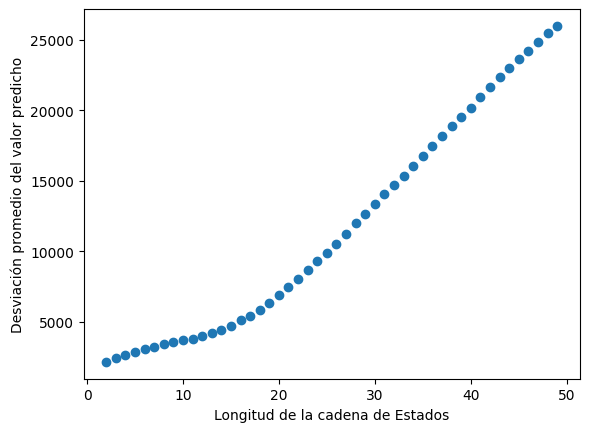

In [38]:
plt.scatter(x=x, y=y1)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Desviación promedio del valor predicho")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

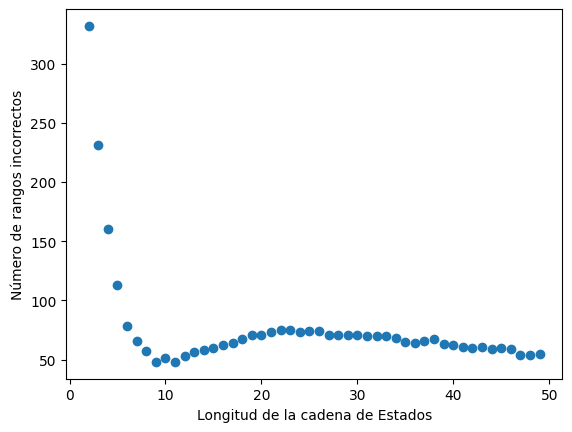

In [39]:
plt.scatter(x=x, y=y2)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Número de rangos incorrectos")
plt.show